# Using SGW 

In [1]:
import sys
import numpy as np
import torch
sys.path.append('./lib')
from sgw_numpy import sgw_cpu
from sgw_pytorch import sgw_gpu
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

### Simple example on random points

##### Example with the numpy implementation


In [2]:
n_samples=300
Xs=np.random.rand(n_samples,2)
Xt=np.random.rand(n_samples,1)
P=np.random.randn(2,500)

In [3]:
%%time
sgw_cpu(Xs,Xt,P=P)

CPU times: user 227 ms, sys: 19.9 ms, total: 247 ms
Wall time: 152 ms


0.030235448228783983

##### Example with the pytorch implementation
(*here no GPU is used*)

In [4]:
xs=torch.from_numpy(Xs).to(torch.float32)
xt=torch.from_numpy(Xt).to(torch.float32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
%%time
sgw_gpu(xs,xt,device,P=torch.from_numpy(P).to(torch.float32))

CPU times: user 32.7 ms, sys: 7.57 ms, total: 40.2 ms
Wall time: 41.2 ms


tensor(0.0302)

### SGW on meshes

In [6]:
path='./data/out_meshes_5.npy'
tab_obj=np.load(path)
nproj=50

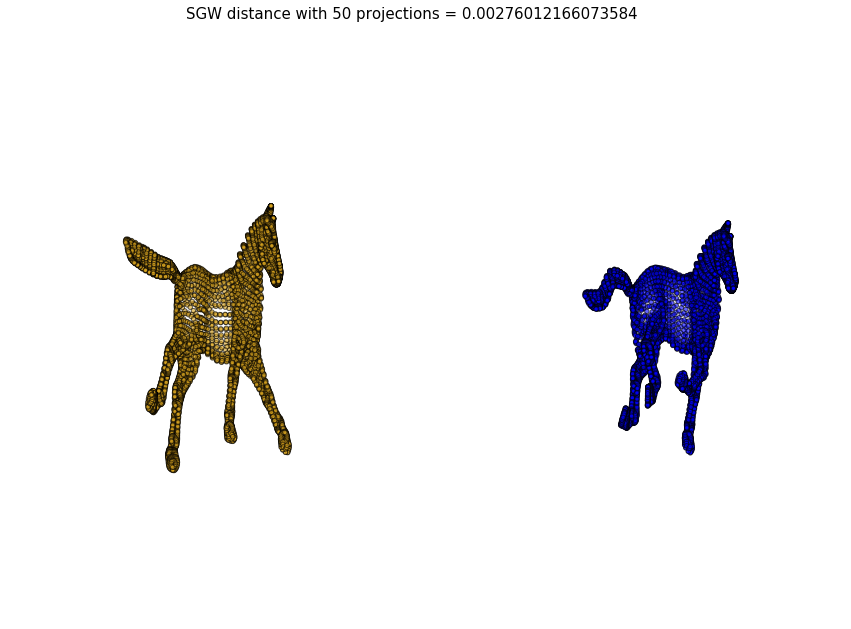

In [16]:
fig = plt.figure(figsize=(15,10))

X1=tab_obj[0]
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X1[:,0],X1[:,2],X1[:,1], marker='o', s=20, c="goldenrod", alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

ax = fig.add_subplot(122, projection='3d')
X2=tab_obj[15]
ax.scatter(X2[:,0],X2[:,2],X2[:,1], marker='o', s=20, c="blue", alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

plt.suptitle('SGW distance with {0} projections = {1}'.format(nproj,sgw_cpu(X1,X2,nproj=nproj)),fontsize=15)
plt.show()